# The Dow Jones Industrial Average and Its 30 Components

## Downloading Dow componentms datasets from Quandl

In [ ]:
!conda remove numpy -y
!conda install numpy -y

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


In [ ]:
import numpy as np
print(np.__version__)

2.0.2


In [ ]:
# FIX: Install and import the necessary libraries in the Colab environment
!pip install yfinance

import yfinance as yf

# FIX: Replaced the delisted 'UTX' with the new 'RTX' ticker
SYMBOLS = [
    'AAPL','MMM', 'AXP', 'BA', 'CAT',
    'CVX', 'CSCO', 'KO', 'DD', 'XOM',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ',
    'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'UNH', 'RTX', 'TRV',
    'VZ', 'V', 'WMT', 'WBA', 'DIS',
]

# Download the adjusted closing prices using yfinance
df_components = yf.download(
    SYMBOLS,
    start='2017-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)['Close']

# Display the first few rows to confirm it worked
df_components.head()

Ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,26.827250,66.700775,145.533676,76.827278,23.355848,82.049706,68.654106,99.918640,201.997589,109.414551,...,21.483496,66.519112,56.959625,100.143509,141.769424,74.963753,34.433502,58.553722,19.715088,61.824562
2017-01-04,26.797216,67.794258,147.063461,76.483955,23.217007,82.028801,69.202370,101.199646,203.302017,110.384018,...,21.672289,66.756088,56.995594,99.605118,142.173370,75.576668,34.395653,58.567848,19.829943,61.144352
2017-01-05,26.933496,66.958580,147.146912,76.018051,23.271006,81.673729,68.892471,101.143135,201.788513,109.080612,...,21.880611,67.198486,57.226868,98.014732,142.410416,76.463020,34.471359,58.603107,19.873009,60.232853
2017-01-06,27.233755,67.091957,147.508514,76.050751,23.317284,81.346489,68.463371,102.650208,204.782089,108.779175,...,21.795984,67.174828,57.843597,97.965019,142.612396,77.519127,33.959980,58.652534,19.600227,60.198841
2017-01-09,27.483204,67.438652,146.785309,75.503075,23.278713,80.650284,68.880531,102.066223,203.101334,109.414551,...,21.789474,66.677116,57.303947,97.178139,142.208496,77.085365,33.590157,58.264347,19.729448,59.205730


In [ ]:
filled_df_components = df_components.fillna(method='ffill')
daily_df_components = filled_df_components.resample('24h').ffill()
daily_df_components = daily_df_components.fillna(method='bfill')

/tmp/ipython-input-4-219771071.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_df_components = df_components.fillna(method='ffill')
/tmp/ipython-input-4-219771071.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_df_components = daily_df_components.fillna(method='bfill')


## Downloading NDAQ Dataset from Alpha Vantage

In [ ]:
import yfinance as yf
import pandas as pd

# --- 1. Download the Data for the Correct Period ---
# FIX: Specify the start and end dates to ensure we have data for 2017.
print("Downloading NDAQ data...")
df = yf.download(
    'NDAQ',
    start='2017-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)

# --- 2. Check if the Download was Successful ---
if df.empty:
    raise ValueError("Data download failed. Please check the ticker or your connection.")

print("Data downloaded successfully.")

# --- 3. Prepare and Resample the DataFrame ---
# FIX: Use the 'Close' column, which is the correct name from yfinance.
df_dji = pd.DataFrame(df['Close'])
df_dji.columns = ['NDAQ']

# The following line will now work because df_dji contains 2017 data.
djia_2017 = pd.DataFrame(df_dji.loc['2017'])

# FIX: Use 'D' for daily resampling, which is the standard pandas frequency string.
djia_2017 = djia_2017.resample('D').ffill()

# Display a sample to confirm it worked
djia_2017.head()

Data downloaded successfully.


,NDAQ
Date,
2017-01-03,19.382505
2017-01-04,19.684814
2017-01-05,19.661554
2017-01-06,19.899914
2017-01-07,19.899914


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NDAQ)   251 non-null    float64
 1   (High, NDAQ)    251 non-null    float64
 2   (Low, NDAQ)     251 non-null    float64
 3   (Open, NDAQ)    251 non-null    float64
 4   (Volume, NDAQ)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [ ]:
df.index

DatetimeIndex(['2025-06-26', '2025-06-27', '2025-06-30', '2025-07-01',
               '2025-07-02', '2025-07-03', '2025-07-07', '2025-07-08',
               '2025-07-09', '2025-07-10', '2025-07-11', '2025-07-14',
               '2025-07-15', '2025-07-16', '2025-07-17', '2025-07-18',
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

# Applying a Kernel Principal Component Analysis

## Finding Eigenvectors and Eigenvalues

In [ ]:
from sklearn.decomposition import KernelPCA

fn_z_score = lambda x: (x - x.mean()) / x.std()

# FIX: Use the correct DataFrame name 'df_components'
df_z_components = df_components.apply(fn_z_score)

# This line will now work
fitted_pca = KernelPCA().fit(df_z_components)

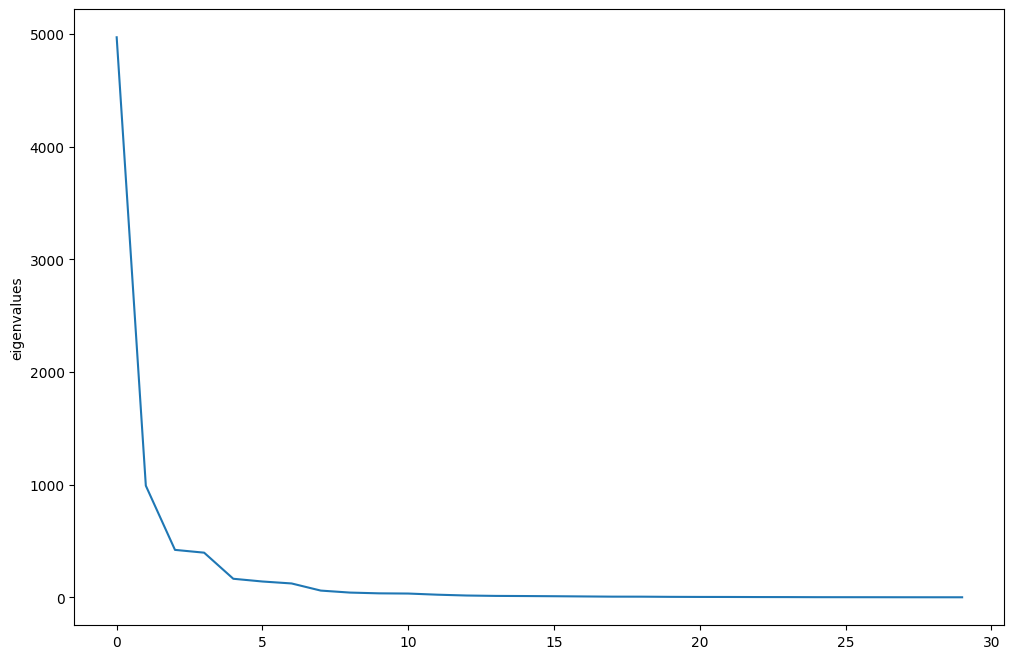

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)

# FIX: Use the correct attribute 'eigenvalues_' instead of the old 'lambdas_'
plt.plot(fitted_pca.eigenvalues_)

plt.ylabel('eigenvalues')
plt.show();

In [ ]:
fn_weighted_avg = lambda x: x / x.sum()

# FIX: Use the correct attribute 'eigenvalues_' instead of the old 'lambdas_'
weighted_values = fn_weighted_avg(fitted_pca.eigenvalues_)[:5]

In [ ]:
print(weighted_values)

[0.66285668 0.13216081 0.05618839 0.05288378 0.02200383]


In [ ]:
weighted_values.sum()

np.float64(0.9260934795961312)

## Reconstructing the Dow Index with PCA

DJIA data downloaded.


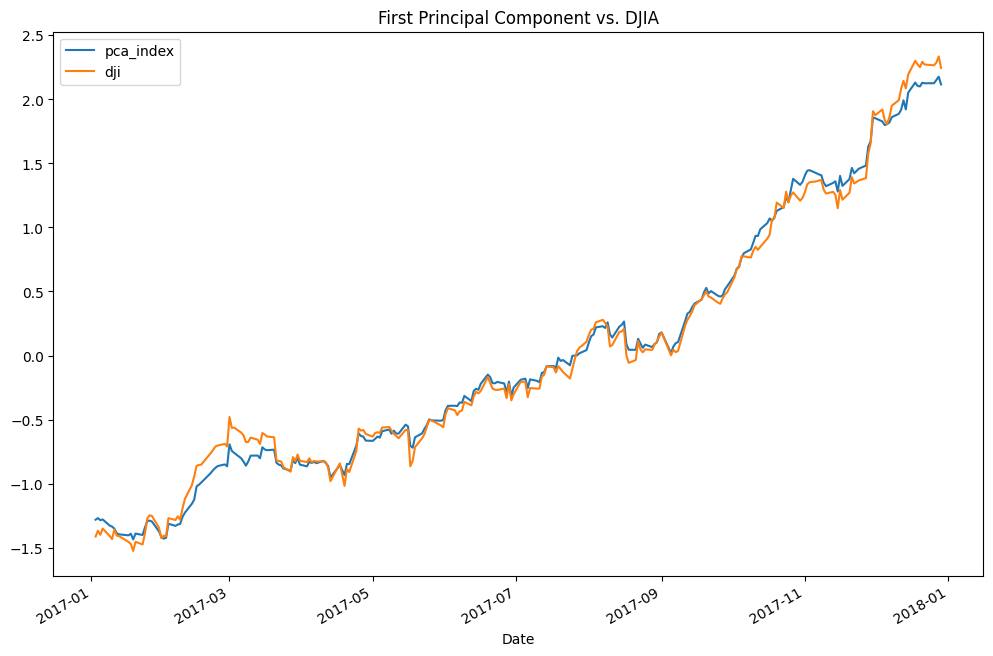

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.decomposition import KernelPCA

# --- 1. Perform PCA and Extract the First Component ---
kernel_pca = KernelPCA(n_components=5).fit(df_z_components)
pca_5 = kernel_pca.transform(df_z_components)

# Use the first principal component as the index.
pca_index = pca_5[:, 0]

# --- 2. Download the actual DJIA for comparison ---
print("Downloading DJIA data...")
djia_df = yf.download(
    '^DJI',
    start='2017-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)['Close']
print("DJIA data downloaded.")

# --- 3. Combine and plot the results ---
# Explicitly align the DJIA data to the components' index.
aligned_djia = djia_df.reindex(df_z_components.index, method='ffill')

# FIX: Force both arrays to be 1-dimensional using .flatten()
df_combined = pd.DataFrame({
    'pca_index': pca_index.flatten(),
    'dji': aligned_djia.to_numpy().flatten()
}, index=df_z_components.index)

# Apply z-score normalization for a fair comparison.
fn_z_score = lambda x: (x - x.mean()) / x.std()
df_combined = df_combined.apply(fn_z_score).dropna()

# Plot the results.
df_combined.plot(figsize=(12, 8), title="First Principal Component vs. DJIA");

# Analyzing a time series with trend

In [ ]:
# FIX: Install and import the yfinance library
!pip install yfinance

import yfinance as yf

# FIX: Download the data for Gold futures ('GC=F') using yfinance
df = yf.download(
    'GC=F',
    start='2000-01-01',
    interval='1mo', # Use '1mo' for monthly data
    auto_adjust=True,
    progress=False
)

# Select and rename the 'Close' column to match the original notebook's intent
df = df[['Close']].rename(columns={'Close': 'Settle'})

# Display the first few rows to confirm it worked
df.head()

Price,Settle
Ticker,GC=F
Date,
2000-08-01,278.299988
2000-09-01,273.600006
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [ ]:
df.head()

Price,Settle
Ticker,GC=F
Date,
2000-08-01,278.299988
2000-09-01,273.600006
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [ ]:
df_settle = df['Settle'].resample('MS').ffill().dropna()

df_rolling = df_settle.rolling(12)
df_mean = df_rolling.mean()
df_std = df_rolling.std()

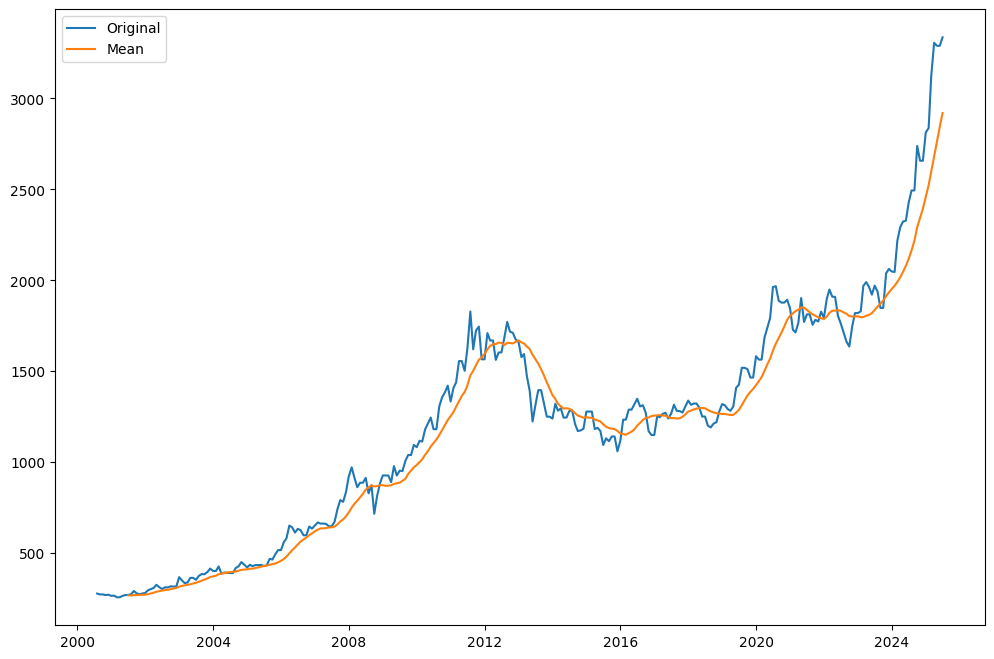

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='Mean')
plt.legend();

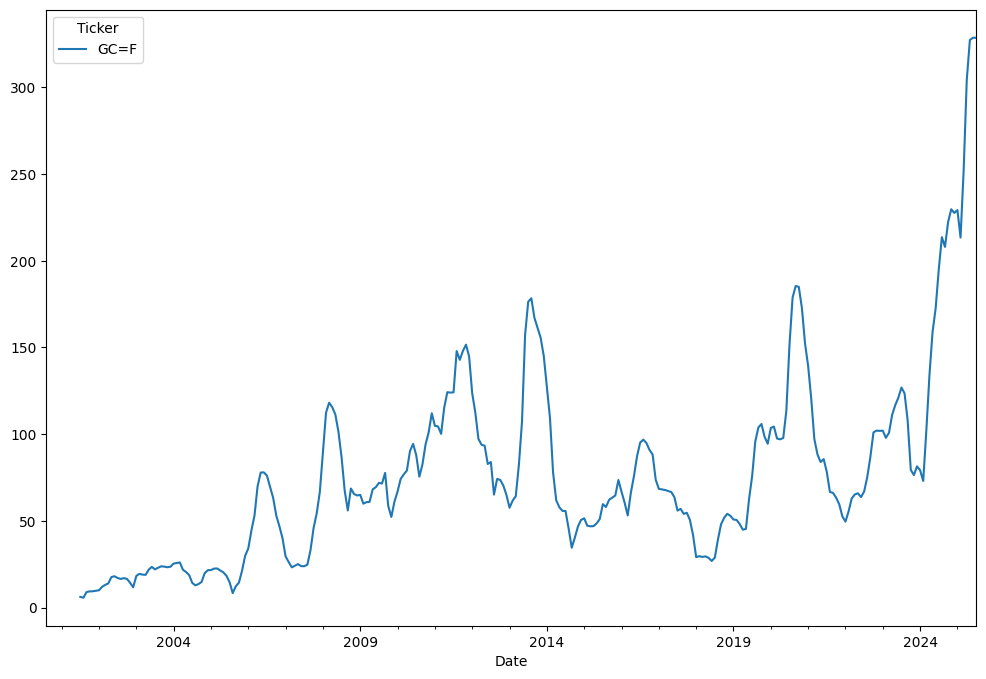

In [ ]:
df_std.plot(figsize=(12, 8));

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_settle)
print('ADF statistic: ',  result[0])
print('p-value:', result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  1.9600849558825775
p-value: 0.9986187858049647
Critical value (1%): -3.452
Critical value (5%): -2.871
Critical value (10%): -2.572


# Making a time series stationary

## Detrending

In [ ]:
import numpy as np

df_log = np.log(df_settle)

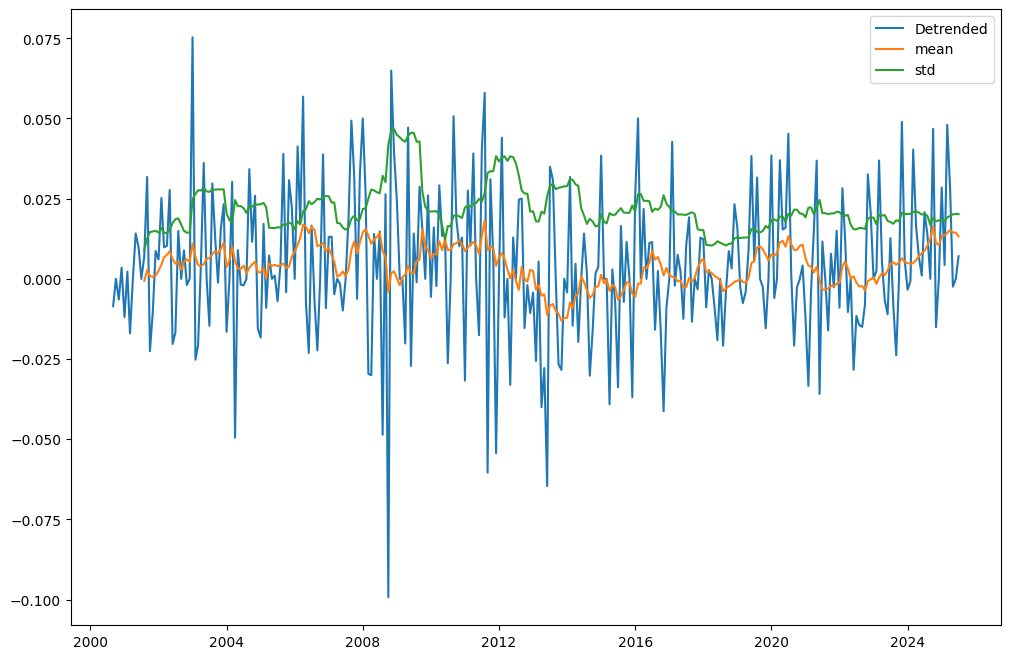

In [ ]:
df_log_ma= df_log.rolling(2).mean()
df_detrend = df_log - df_log_ma
df_detrend.dropna(inplace=True)

# Mean and standard deviation of detrended data
df_detrend_rolling = df_detrend.rolling(12)
df_detrend_ma = df_detrend_rolling.mean()
df_detrend_std = df_detrend_rolling.std()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(df_detrend, label='Detrended')
plt.plot(df_detrend_ma, label='mean')
plt.plot(df_detrend_std, label='std')
plt.legend(loc='upper right');

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_detrend)
print('ADF statistic: ', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  -18.17068834664557
p-value: 0.00000
Critical value (1%): -3.452
Critical value (5%): -2.871
Critical value (10%): -2.572


## Removing trend by differencing

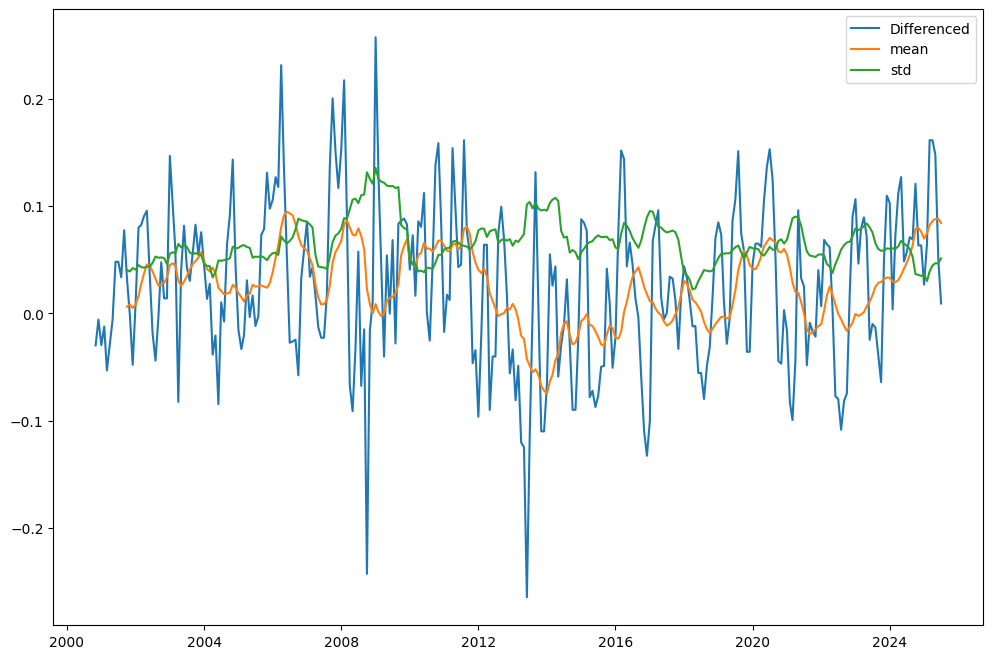

In [ ]:
df_log_diff = df_log.diff(periods=3).dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='mean')
plt.plot(df_diff_std, label='std')
plt.legend(loc='upper right');

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_log_diff)

print('ADF statistic:', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -2.522647114377219
p-value: 0.11006
Critical value (1%): -3.454
Critical value (5%): -2.872
Critical value (10%): -2.572


## Seasonal Decomposing

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# FIX: Replaced the outdated 'freq' argument with the modern 'period' argument
decompose_result = seasonal_decompose(df_log.dropna(), period=12)

df_trend = decompose_result.trend
df_season = decompose_result.seasonal
df_residual = decompose_result.resid

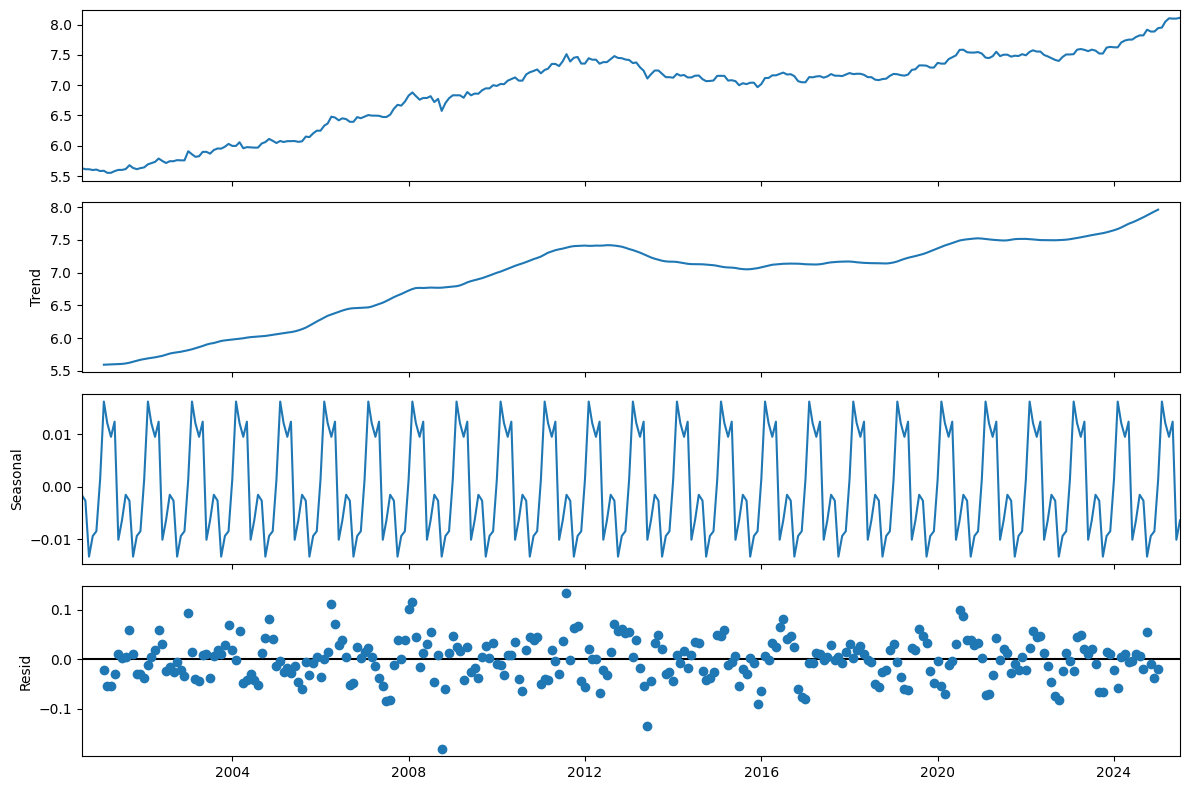

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
fig = decompose_result.plot()

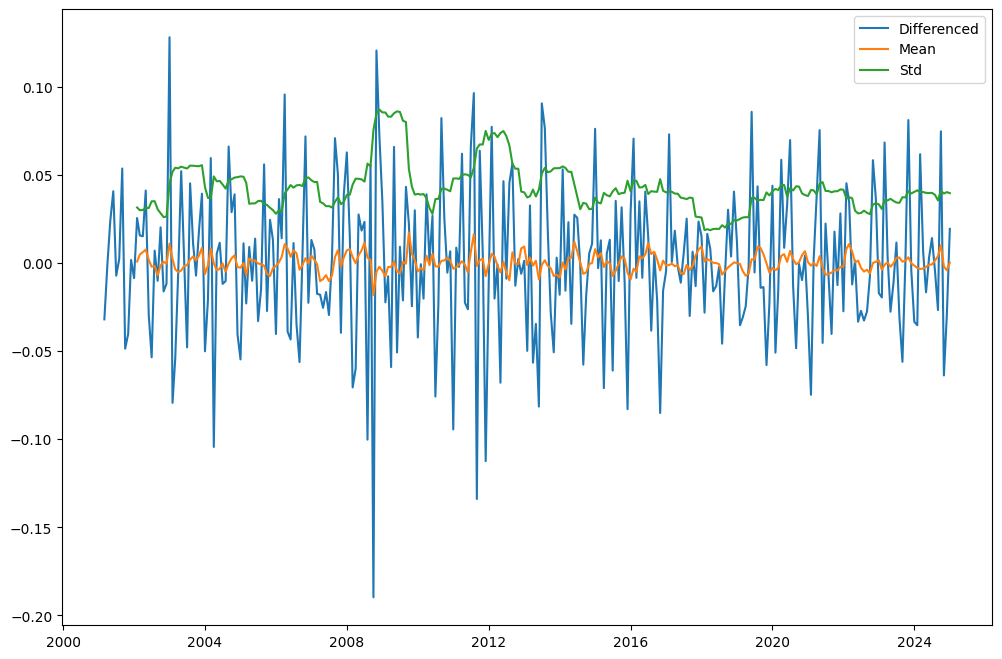

In [ ]:
df_log_diff = df_residual.diff().dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='Mean')
plt.plot(df_diff_std, label='Std')
plt.legend();

In [ ]:
result = adfuller(df_residual.dropna())

print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -7.5069497805986884
p-value: 0.00000
Critical value (1%): -3.454
Critical value (5%): -2.872
Critical value (10%): -2.572


# Forecasting and Predicting a Time Series

## Finding model parameters by grid search

In [ ]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))

    lowest_aic, pdq, pdqs = None, None, None

    total_iterations = 0
    for order in param_combinations:
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(df_settle, order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    disp=False
                )
                model_result = model.fit(maxiter=200, disp=False)

                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue

    return lowest_aic, pdq, pdqs

In [ ]:
lowest_aic, order, seasonal_order = arima_grid_search(df_settle, 12)

In [ ]:
print('ARIMA{}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA(0, 1, 1)x(0, 1, 1, 12)
Lowest AIC: 3060.441


## Fitting the SARIMAX model

In [ ]:
model = SARIMAX(
    df_settle,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    disp=False
)

model_results = model.fit(maxiter=200, disp=False)

In [ ]:
print(model_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               GC=F   No. Observations:                  300
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1527.220
Date:                            Sun, 27 Jul 2025   AIC                           3060.441
Time:                                    19:09:29   BIC                           3071.269
Sample:                                08-01-2000   HQIC                          3064.787
                                     - 07-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0102      0.047      0.218      0.827      -0.081       0.101
ma.S.L12      -0.8643      0.038   

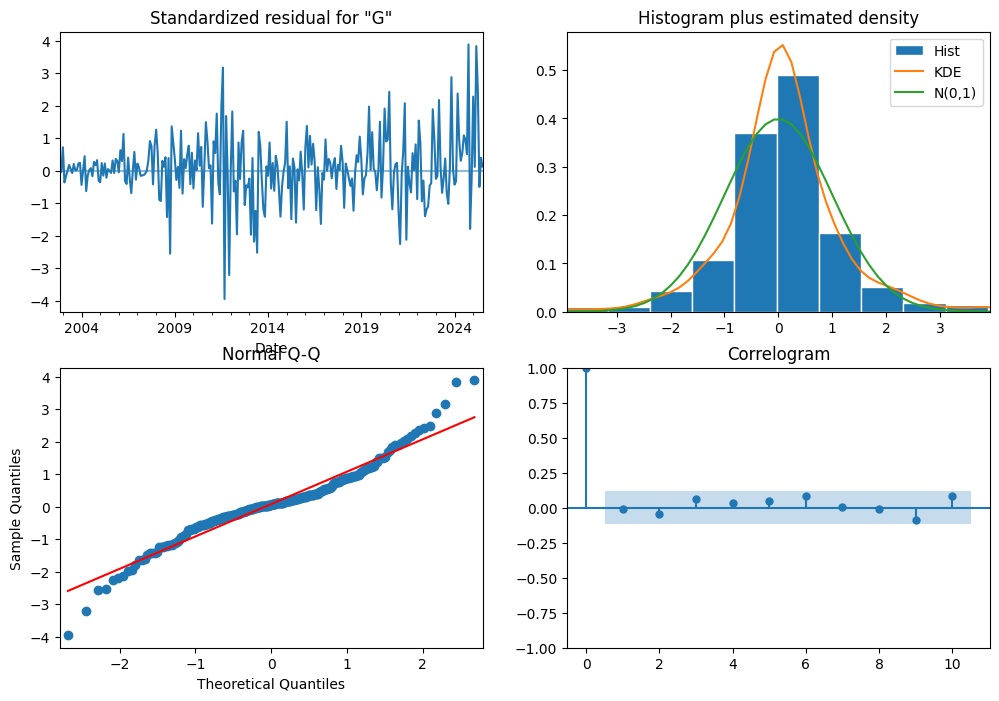

In [ ]:
model_results.plot_diagnostics(figsize=(12, 8));

In [ ]:
model_results.resid.describe()

,0
count,300.000000
mean,5.067553
std,64.197267
min,-254.506133
25%,-20.166885
50%,3.273016
75%,25.657345
max,278.299988


## Predicting the model

In [ ]:
n = len(df_settle.index)
prediction = model_results.get_prediction(
    start=n-12*5,
    end=n+5
)
prediction_ci = prediction.conf_int()

In [ ]:

print(prediction_ci.head(3))

             lower GC=F   upper GC=F
2020-08-01  1866.642234  2117.391358
2020-09-01  1838.141144  2088.890212
2020-10-01  1755.666915  2006.384439


<Figure size 1200x600 with 0 Axes>

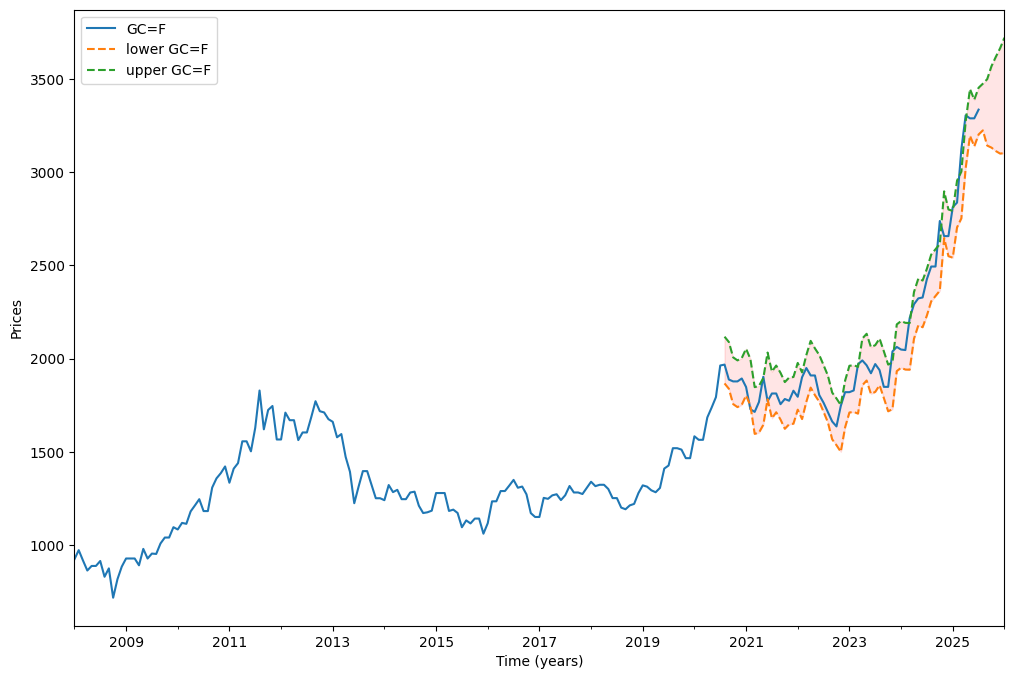

In [ ]:
plt.figure(figsize=(12, 6))

ax = df_settle['2008':].plot(label='actual')
prediction_ci.plot(
    ax=ax, style=['--', '--'],
    label='predicted/forecasted')

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:, 0]
upper_ci = prediction_ci.iloc[:, 1]

ax.fill_between(ci_index, lower_ci, upper_ci,
    color='r', alpha=.1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Prices')

plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')